# 3DEditBench Data Visualization

This notebook provides visualization tools for the 3DEditBench dataset. You can specify an index to load and visualize any sample from the dataset.

## Features:
- Load HDF5 data by index (sorted by filename)
- Visualize the data


In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import os

# Set matplotlib to display plots inline
%matplotlib inline


In [2]:
# Configuration
DATA_DIR = "../datasets/3DEditBench"  # Path to dataset directory

# Get all HDF5 files and sort them
hdf5_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.hdf5")))
print(f"Found {len(hdf5_files)} HDF5 files")

# Show first few filenames
for i, filepath in enumerate(hdf5_files[:5]):
    print(f"Index {i}: {os.path.basename(filepath)}")
print("...")


Found 106 HDF5 files
Index 0: 0000.hdf5
Index 1: 0001.hdf5
Index 2: 0002.hdf5
Index 3: 0003.hdf5
Index 4: 0004.hdf5
...


In [3]:
def load_data(index):
    """Load data from HDF5 file by index"""
    if index >= len(hdf5_files):
        print(f"Error: Index {index} is out of range. Max index is {len(hdf5_files)-1}")
        return None
    
    filepath = hdf5_files[index]
    print(f"Loading: {os.path.basename(filepath)}")
    
    data = {}
    with h5py.File(filepath, 'r') as f:
        for key in f.keys():
            data[key] = f[key][:]
    
    return data, filepath


In [4]:
def visualize_sample(index):
    """Visualize a sample by index"""
    result = load_data(index)
    if result is None:
        return
    
    data, filepath = result
    
    # Extract data
    image1 = data['image1']
    image2 = data['image2']
    gt_segment = data['GT_segment']
    point_prompt = data['point_prompt']
    
    # Normalize images
    if image1.max() > 1.0:
        image1 = image1.astype(np.float32) / 255.0
    if image2.max() > 1.0:
        image2 = image2.astype(np.float32) / 255.0
    
    image1 = np.clip(image1, 0, 1)
    image2 = np.clip(image2, 0, 1)
    
    # Create visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot 1: GT Image 1
    axes[0].imshow(image1)
    axes[0].set_title('GT Image 1', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Plot 2: GT Image 2
    axes[1].imshow(image2)
    axes[1].set_title('GT Image 2', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    # Plot 3: GT Image 1 with overlays
    axes[2].imshow(image1)
    
    # Add segmentation overlay
    seg_mask = gt_segment > 0
    overlay = np.zeros((gt_segment.shape[0], gt_segment.shape[1], 4))
    overlay[seg_mask] = [1, 1, 0, 0.3]  # Yellow with 30% transparency
    axes[2].imshow(overlay)
    
    # Add point prompt
    if len(point_prompt) >= 2:
        x, y = point_prompt[0], point_prompt[1]
        circle = patches.Circle((x, y), radius=8, color='lime', linewidth=3, fill=False)
        axes[2].add_patch(circle)
        center = patches.Circle((x, y), radius=3, color='lime', fill=True)
        axes[2].add_patch(center)
    
    axes[2].set_title('GT Image 1 + Point Prompt + SAM Segmentation', fontsize=14, fontweight='bold')
    axes[2].axis('off')
    
    # Add title
    filename = os.path.basename(filepath)
    fig.suptitle(f'Dataset Visualization: {filename}\n', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print info
    print(f"Point prompt coordinates: {point_prompt}")
    print(f"Segmentation unique values: {np.unique(gt_segment)}")


## Visualize Data

Change the index below to visualize different samples:


Loading: 0000.hdf5


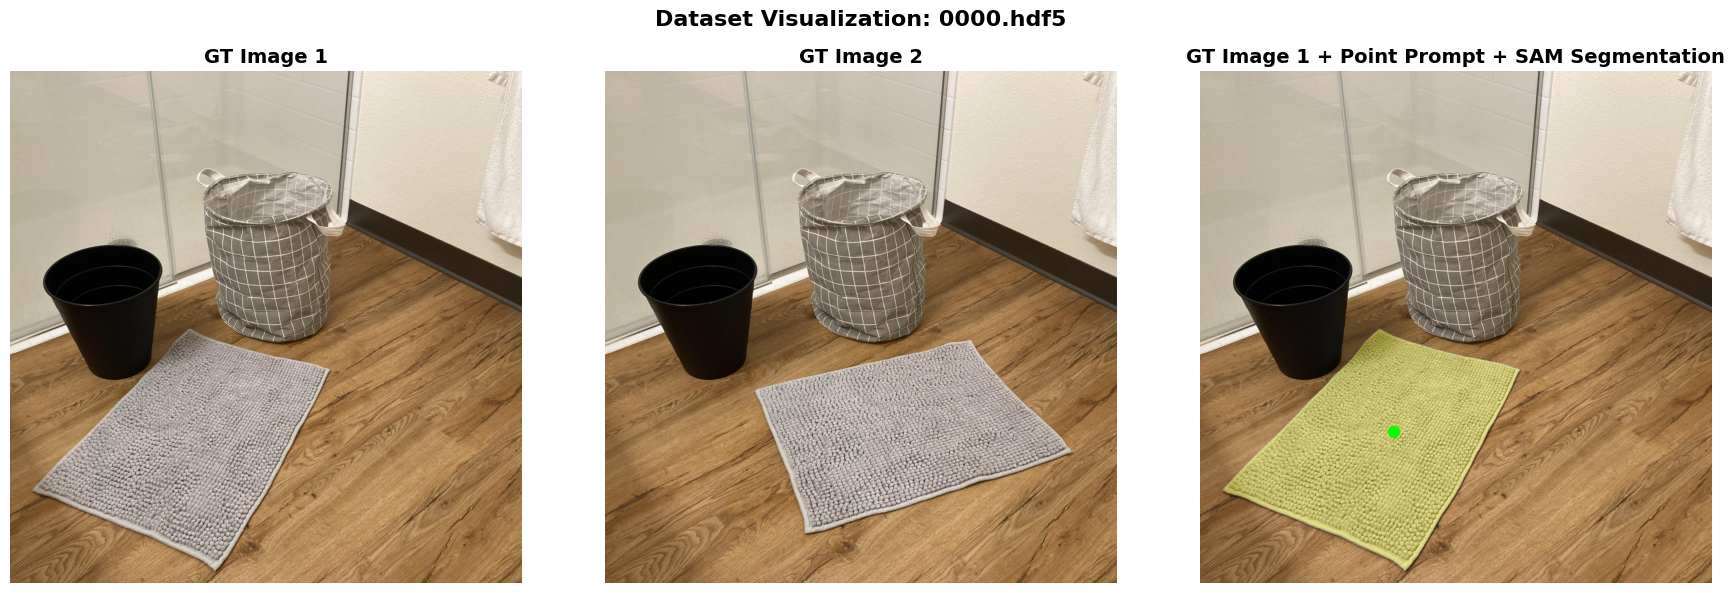

Point prompt coordinates: [388 721]
Segmentation unique values: [0 1]


In [5]:
# Specify the index of the sample to visualize
sample_index = 0  # Change this to any index from 0 to 105

visualize_sample(sample_index)


Loading: 0000.hdf5


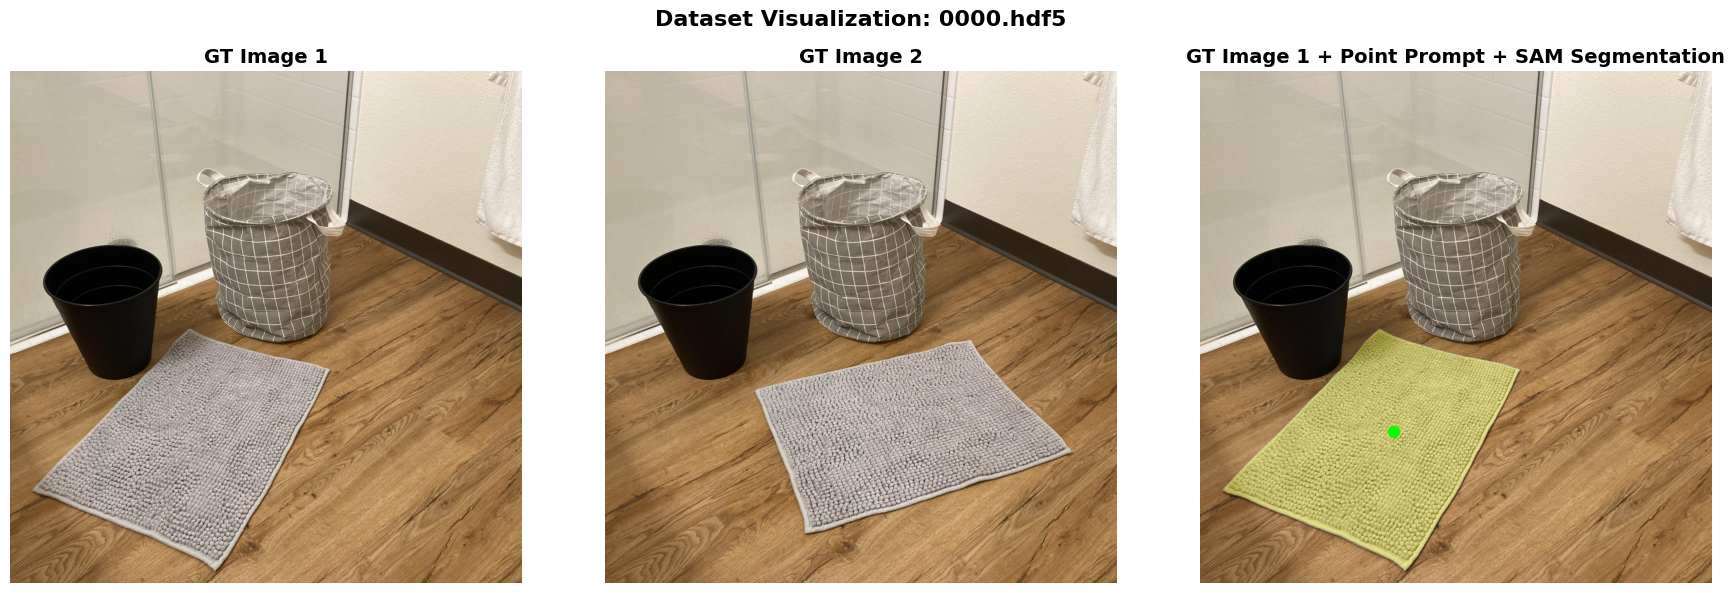

Point prompt coordinates: [388 721]
Segmentation unique values: [0 1]
Loading: 0001.hdf5


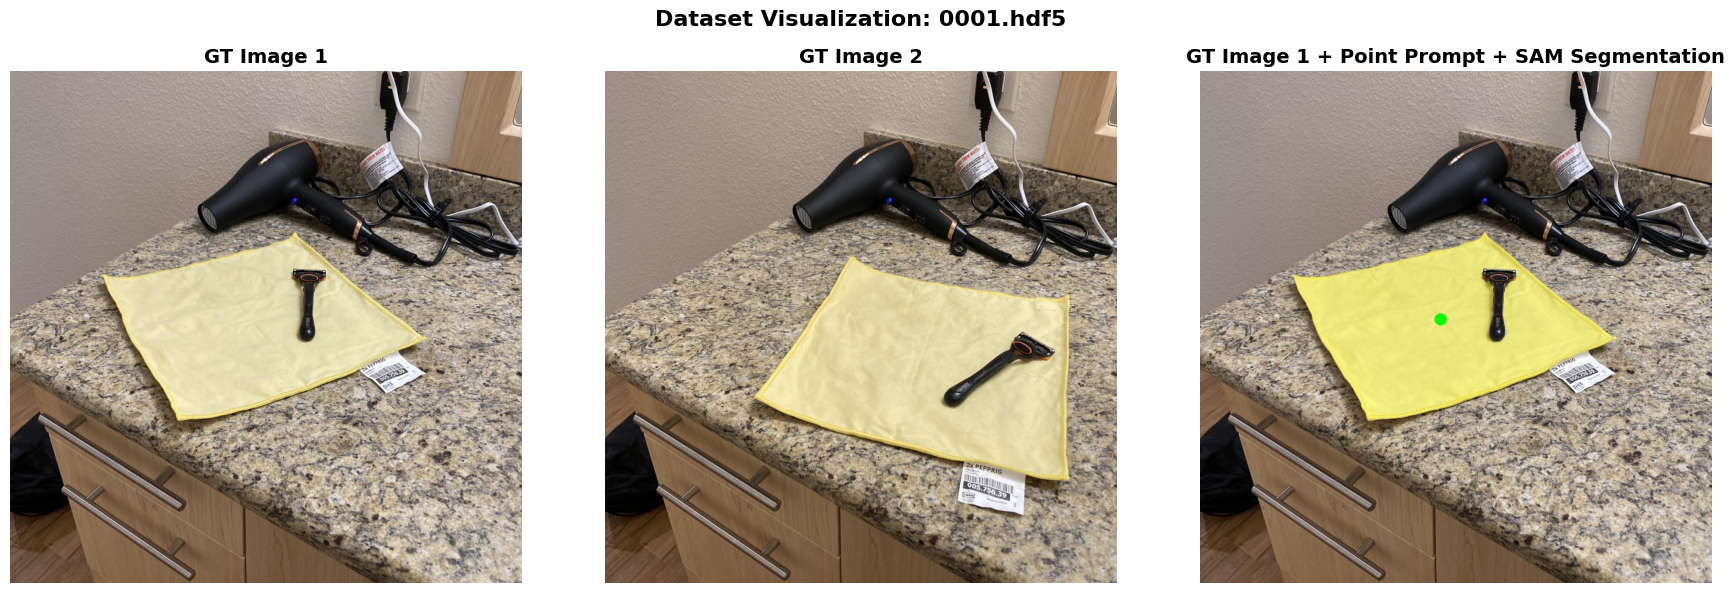

Point prompt coordinates: [481 496]
Segmentation unique values: [0 1]
Loading: 0002.hdf5


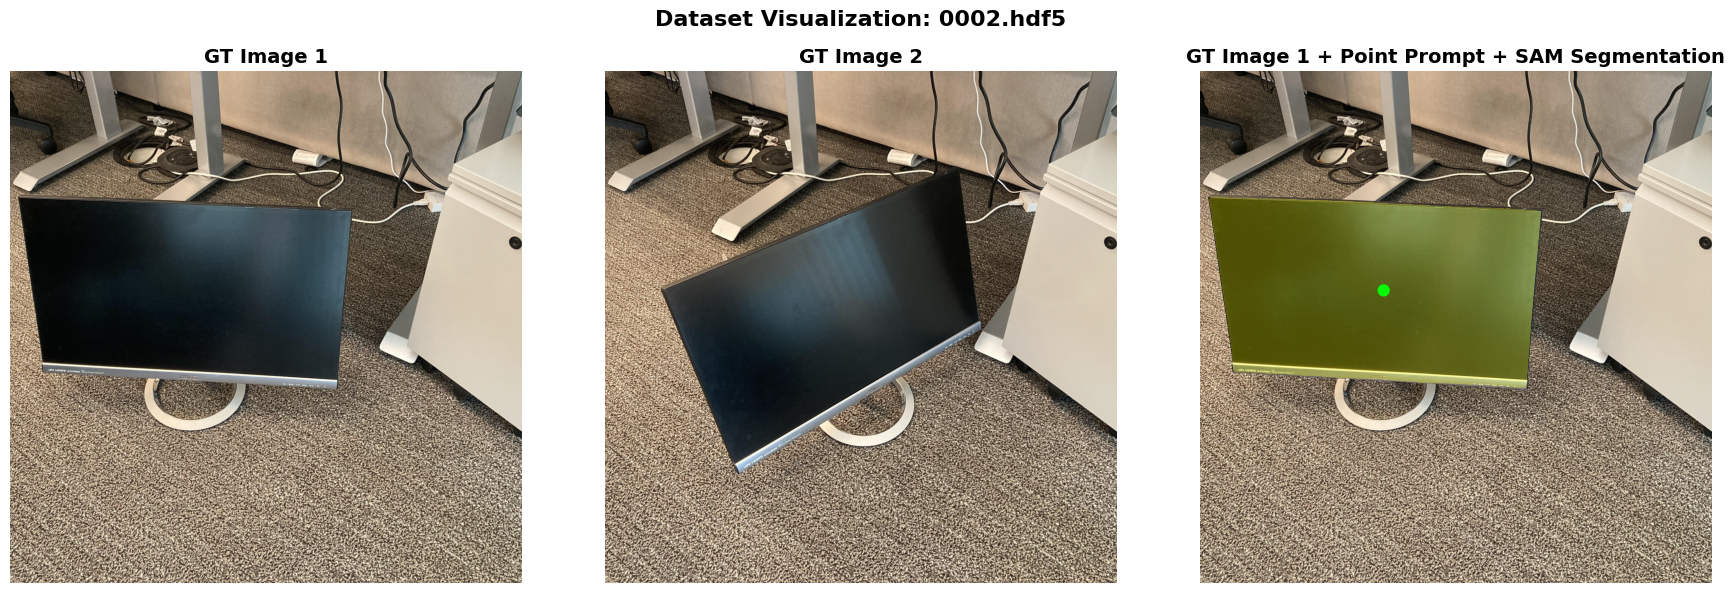

Point prompt coordinates: [367 438]
Segmentation unique values: [0 1]
Loading: 0003.hdf5


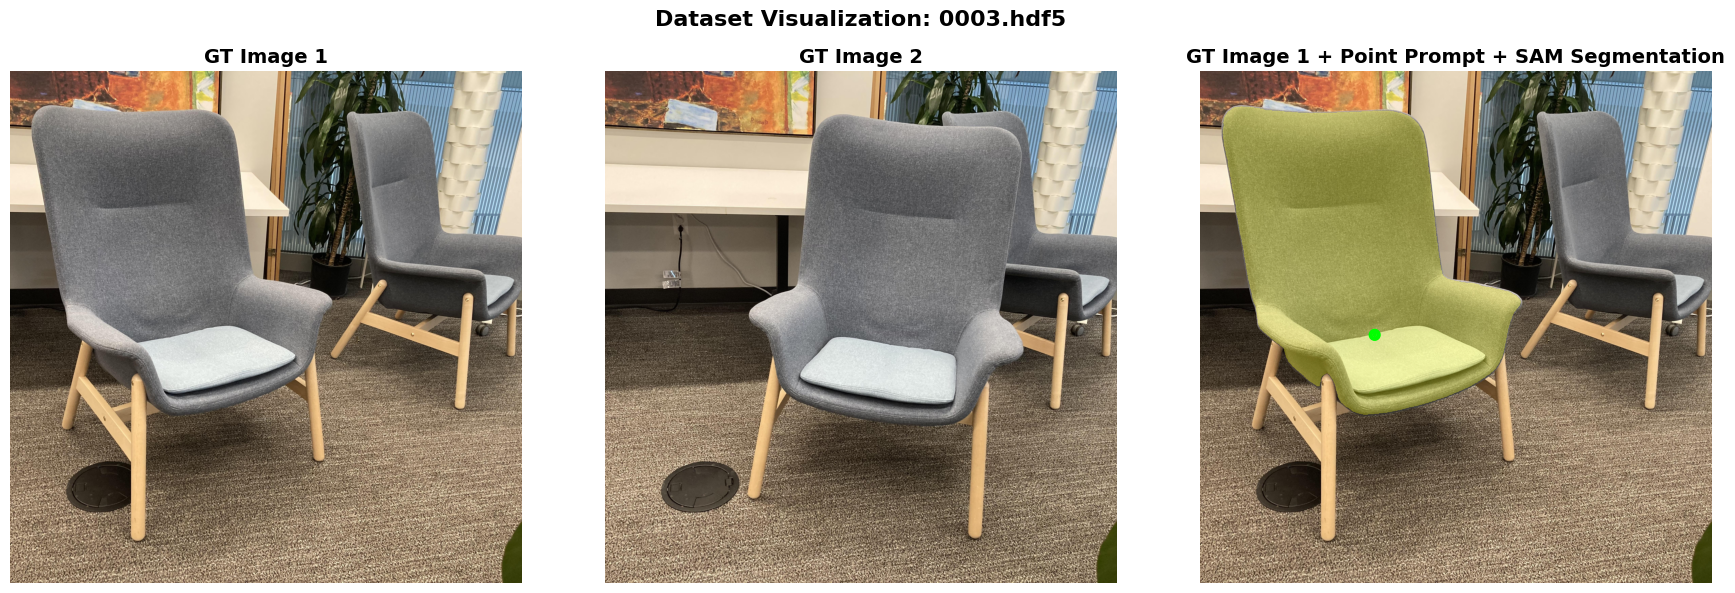

Point prompt coordinates: [349 527]
Segmentation unique values: [0 1]
Loading: 0004.hdf5


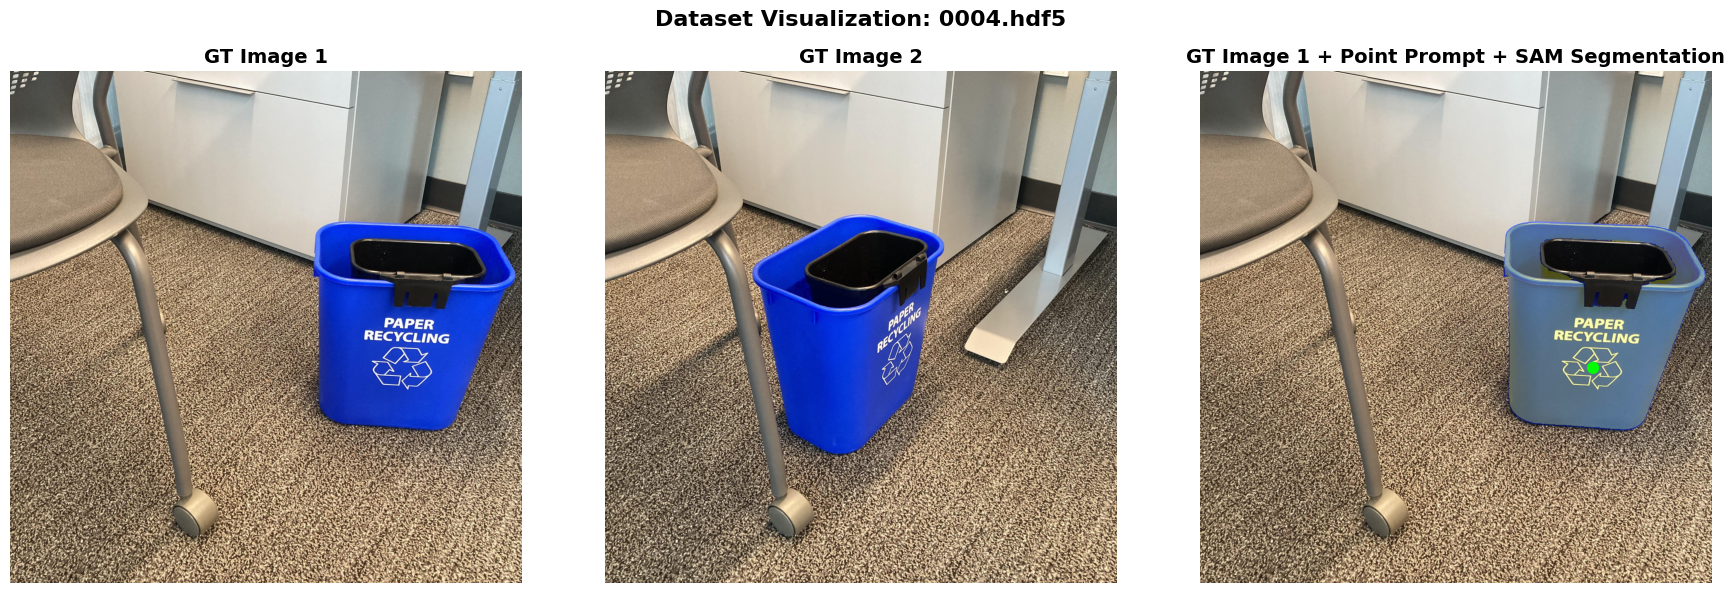

Point prompt coordinates: [786 593]
Segmentation unique values: [0 1]


In [6]:
for i in range(5):
    visualize_sample(i)